In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_style('white')
sns.set_context("talk")

In [44]:
path = "C:/Users/Shinichi/Desktop/test_analysis_for_opto/locomotor_activity_th=3.csv"
test_data = pd.read_csv(path)
dir_path = os.path.dirname(path)
os.chdir(dir_path)

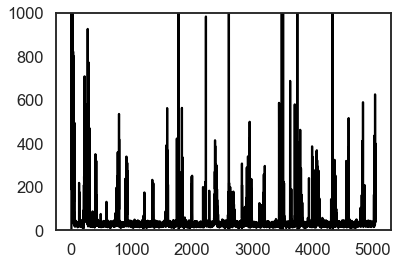

In [45]:
plt.plot(test_data.iloc[:,1], color = "black")
plt.ylim(0, 1000)
plt.savefig("./motion_data.png")

In [46]:
threshold = 80
motion_data = test_data.iloc[:,1].values
MorQ = np.where(motion_data > threshold, 1, 0)

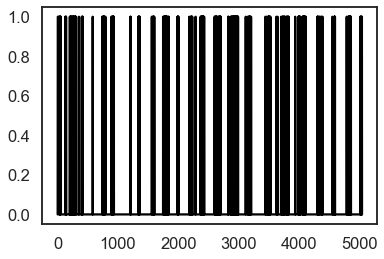

In [47]:
plt.plot(MorQ, color = "black")
plt.savefig("./MorQ.png")

In [48]:
timeaxis = test_data.iloc[:,0]* 0.5

In [49]:
Shortest_M_bout_duration = 5
tempstart = 0
motion = np.zeros(len(timeaxis))
for i in np.where(motion_data > threshold)[0]:
    timeduration = float(timeaxis[i] - timeaxis[tempstart])
    if timeduration < Shortest_M_bout_duration:
        motion[tempstart:i] = 1
    else:
        pass
    tempstart = i


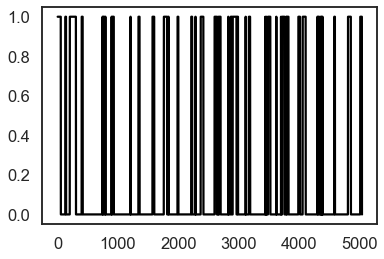

In [63]:
plt.plot(motion, color = "black")
plt.savefig("./motion_bout_fig.png")

# 刺激を行ったframeをIgorで確認して, それをうちこめば計算をするようにするか

In [69]:
timeaxis_array = timeaxis.values
motion_bout_df = pd.DataFrame(np.vstack([timeaxis_array, motion]).T, columns= ["time", "motion_bout"])
motion_bout_df.to_csv("./motion_bout_df.csv", index =False)

In [71]:
stimuli_list = [1775, 2610, 3745,4326]
extracted_data = motion[stimuli_list[0]:]
index_min = np.argmin(extracted_data)

In [85]:
def duration_analysis(data, stimulated_frame):
    extract_data = data[stimulated_frame:]
    if extracted_data[0] != 1:
        motion_duration = 0
    else:
        motion_duration = np.argmin(extracted_data)/2
    return motion_duration

def analysis(path, stimuli_list):
    data = pd.read_csv(path)
    dir_path = os.path.dirname(path)
    os.chdir(dir_path)
    motion_duration_list = []
    for i in range(len(stimuli_list)):
        motion_duration_list.append(duration_analysis(data, stimuli_list[i]))
    motion_duration_df = pd.DataFrame(np.vstack((stimuli_list, motion_duration_list)).T,
                                      columns=["stimuli timing", "motion_duration (sec)"])
    motion_duration_df.to_csv("./motion_duration_df.csv")


In [86]:
stimuli_list = [1775, 2610, 3745,4326]
path = "C:/Users/Shinichi/Desktop/test_analysis_for_opto/locomotor_activity_th=3.csv"
analysis(path, stimuli_list)